1362.2720576850766

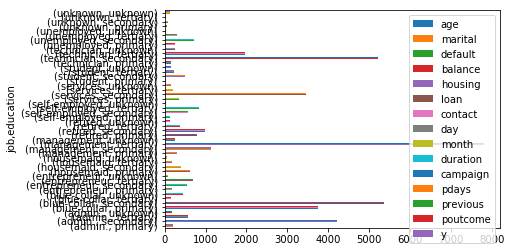

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections

df = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstoneproject/bank/bank-full.csv',delimiter=";")

#Grouping the data based on client job and education
#how to change the labels 
df1 = df.groupby(['job','education']).count()

df1.plot(kind = 'barh')

#average early balance of clients
df['balance'].mean()


In [36]:
#The range of balance amount the account ranges from -8019 to 102127
df['balance'].max() 


102127

In [35]:
df['balance'].min()

-8019

In [39]:
# Clients who have subscribed to term deposit whose balance amount is less than 0
df.loc[(df['y']== 'yes') & (df["balance"] <= 0)].count()


age          502
job          502
marital      502
education    502
default      502
balance      502
housing      502
loan         502
contact      502
day          502
month        502
duration     502
campaign     502
pdays        502
previous     502
poutcome     502
y            502
dtype: int64

In [40]:
# Number of clients who have positive balance on their accounts who have subscribed to term deposit
df.loc[(df['y']== 'yes') & (df["balance"] > 0)].count()


age          4787
job          4787
marital      4787
education    4787
default      4787
balance      4787
housing      4787
loan         4787
contact      4787
day          4787
month        4787
duration     4787
campaign     4787
pdays        4787
previous     4787
poutcome     4787
y            4787
dtype: int64

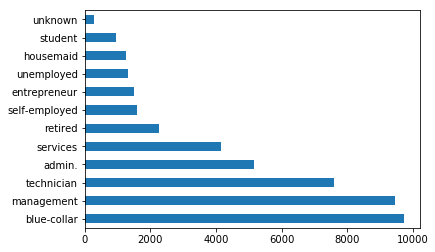

In [22]:
#Job information of the clients contacted for this campaign
df['job'].value_counts().plot(kind='barh')


In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

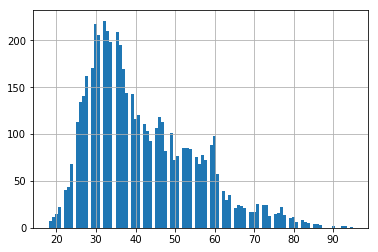

In [77]:
#Clients who have subscribed to term deposit displayed based on their age
df['res'] = df.loc[df['y'] == 'yes', 'age']
df['res'].hist(bins = 100)

In [76]:
#Checking if there are any clients who have subscribed to term deposit who is unemployed or whose job category is unknown
#From the below information it looks like the clients who subscribed to term deposit are employed

df.loc[(df['y']== 'yes') & (df["job"] == 'unemployed') & (df['job'] == 'unknown')].count()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
res          0
res1         0
dtype: int64

In [63]:
#Total number of clients who are either students or part time workers who have subscribed to term deposit
sum(df['res'].between(0,21))

55

In [62]:
# Total number of Customers with age more than 20 who have subscribed for term deposit
sum(df['res'].between(21,100))

5256

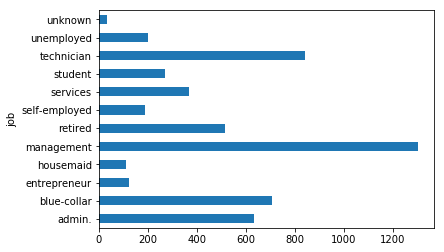

In [60]:
#Clients who have subscribed to term deposit and their job categories
# From the below information the clients in management jobs seem to be subscribing to term deposit then other categories
# Top three jobs for which term deposit are larger seems to be Management, Technician,blue-collar jobs
df.loc[df['y'] == 'yes','job'].groupby(df['job']).size().plot(kind = 'barh')


In [66]:
#customer who has both housing loan and personal loan subcribed to term deposit
# Of total of 5289 clients who have subscribed to term deposit the amount of client who have both loan,housing loan and term deposit is only 5%

df.loc[(df['y']== 'yes') & (df["loan"] == 'yes') & (df['housing'] == 'yes')].count()

age          265
job          265
marital      265
education    265
default      265
balance      265
housing      265
loan         265
contact      265
day          265
month        265
duration     265
campaign     265
pdays        265
previous     265
poutcome     265
y            265
res          265
res1         265
dtype: int64

In [56]:
#Total number of clients who have subscribed to term deposit
(df.loc[df['y'] == 'yes']).count()

age          5289
job          5289
marital      5289
education    5289
default      5289
balance      5289
housing      5289
loan         5289
contact      5289
day          5289
month        5289
duration     5289
campaign     5289
pdays        5289
previous     5289
poutcome     5289
y            5289
res          5289
res1         5289
dtype: int64

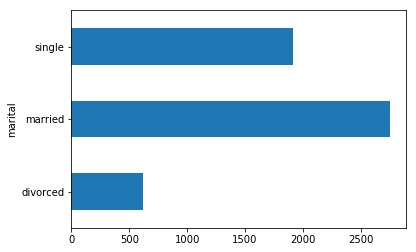

In [54]:
df.loc[df['y'] == 'yes','marital'].groupby(df['marital']).size().plot(kind = 'barh')

#Marital status of the clients who have subscribed to term deposit.
# According to the information the clients who are married seem have largest number of term depsoit 

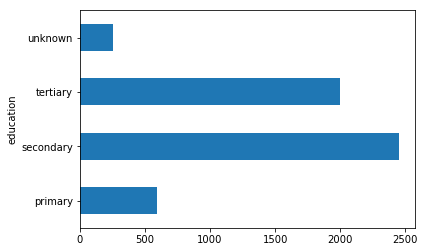

In [53]:
# The education of client who have subscribed to term deposit
df.loc[df['y'] == 'yes','education'].groupby(df['education']).size().plot(kind = 'barh')

#From the below graph the clients who have secondary degree have subscribed to term deposit more than other categories

In [51]:
#Total number of default credit card payment 
df.groupby(["default", "y"]).size()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
dtype: int64

In [50]:
#The number of client whose outcome of the previous marketing campaign was success who also have subscribed to term deposit
df.loc[(df['y']== 'yes') & (df["poutcome"] == 'success') ].count()

age          978
job          978
marital      978
education    978
default      978
balance      978
housing      978
loan         978
contact      978
day          978
month        978
duration     978
campaign     978
pdays        978
previous     978
poutcome     978
y            978
res          978
res1         978
dtype: int64

In [42]:
#df.loc[df['y'] == 'yes'].groupby(["campaign"]).size().reset_index()


In [40]:
# Total count of campaign done this year
sum(df.loc[df['y'] == 'yes','campaign'].between(0,63))

5289

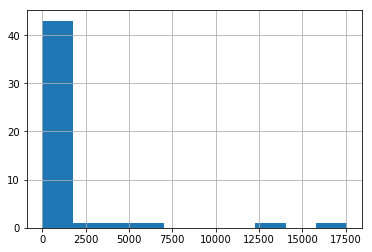

In [7]:
#number of contacts performed during this campaign and for this client 
df['campaign'].value_counts().hist()

In [16]:
#collecting the metrics on people subscribed to term deposit and number of customers being contacted monthly
df12 = df.loc[df['y'] == 'yes'].groupby(["month"]).size().reset_index()
df12.columns = ["month","size"]

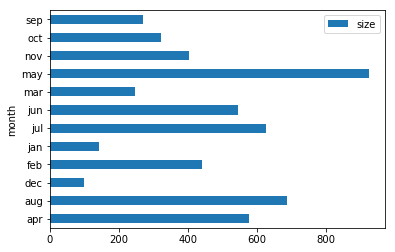

In [17]:
df12.plot(kind='barh',x = 'month',y = 'size')

In [ ]:
#Month of may has largest number of customers who have subscribed for term despoist 

In [7]:
# Collecting the information about the people who has subscribed for term deposit and their contact mode
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

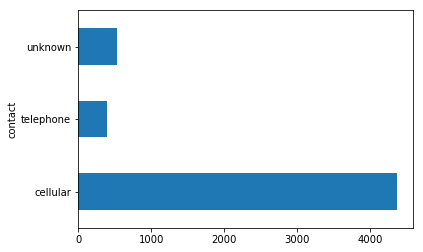

In [11]:

df.loc[df['y'] == 'yes','contact'].groupby(df['contact']).size().plot(kind = 'barh')
#Among the different contact type the person contacted via cellphone has more number of chances for subscribing for term deposit